In [1]:
import numpy as np
from foe_foundry_nl.embeddings import embeddings, similarity, distance
from foe_foundry_nl.data.monsters import get_canonical_monsters, name_to_key, SrdMonsterSelector
from foe_foundry.creature_types import CreatureType
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


sns.set_style("whitegrid")
sns.set_palette("hls", len(CreatureType.all()))

In [2]:
monsters = get_canonical_monsters()
embeddings = embeddings(list(monsters.keys()), skip_if_missing=True)

<Axes: xlabel='x1', ylabel='x2'>

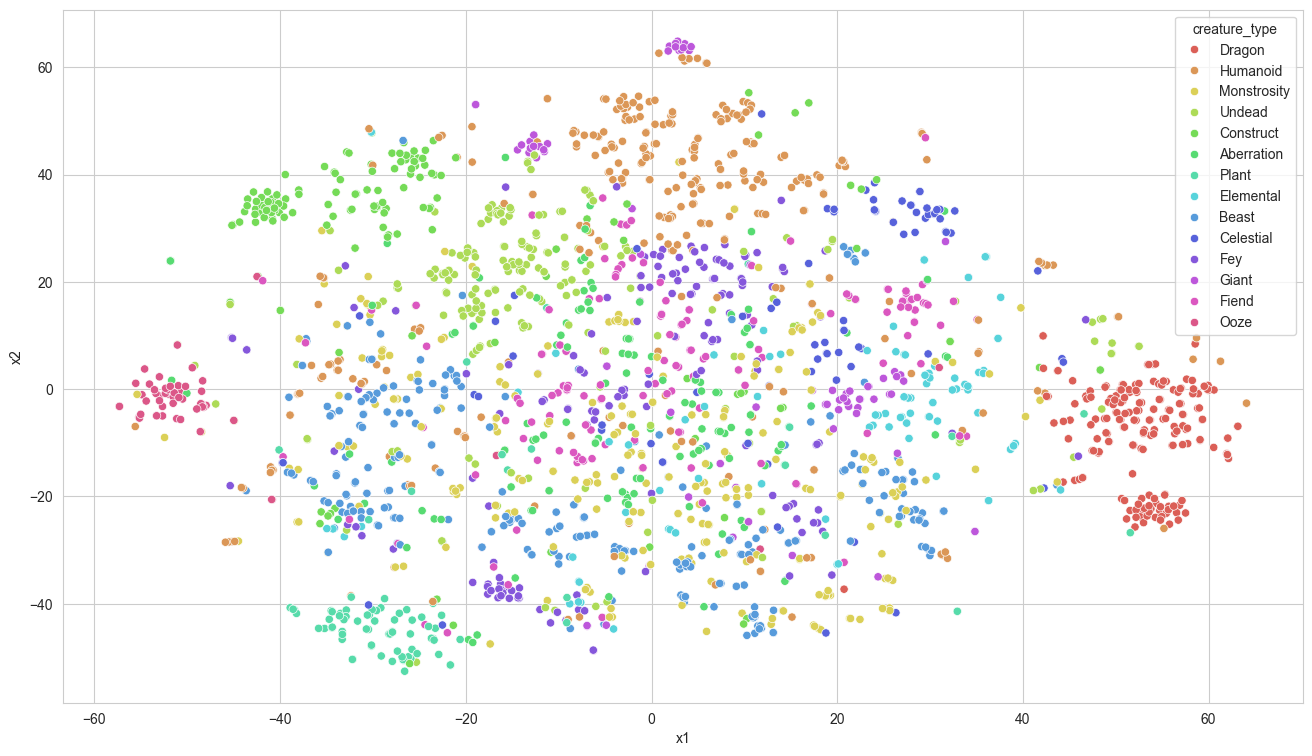

In [3]:
tsne = TSNE(n_components=2, random_state=20240711)
X = tsne.fit_transform(embeddings.embeddings)

x1, x2 = X[:, 0], X[:, 1]
ct = [monsters[k].creature_type for k in embeddings.keys]

df = pd.DataFrame([
    pd.Series(x1, name='x1'),
    pd.Series(x2, name='x2'),
    pd.Series(ct, name='creature_type')
]).T

fig, ax = plt.subplots(1,1, figsize=(16,9))
sns.scatterplot(
    data=df,
    x='x1',
    y='x2',
    hue='creature_type',
    ax=ax
)


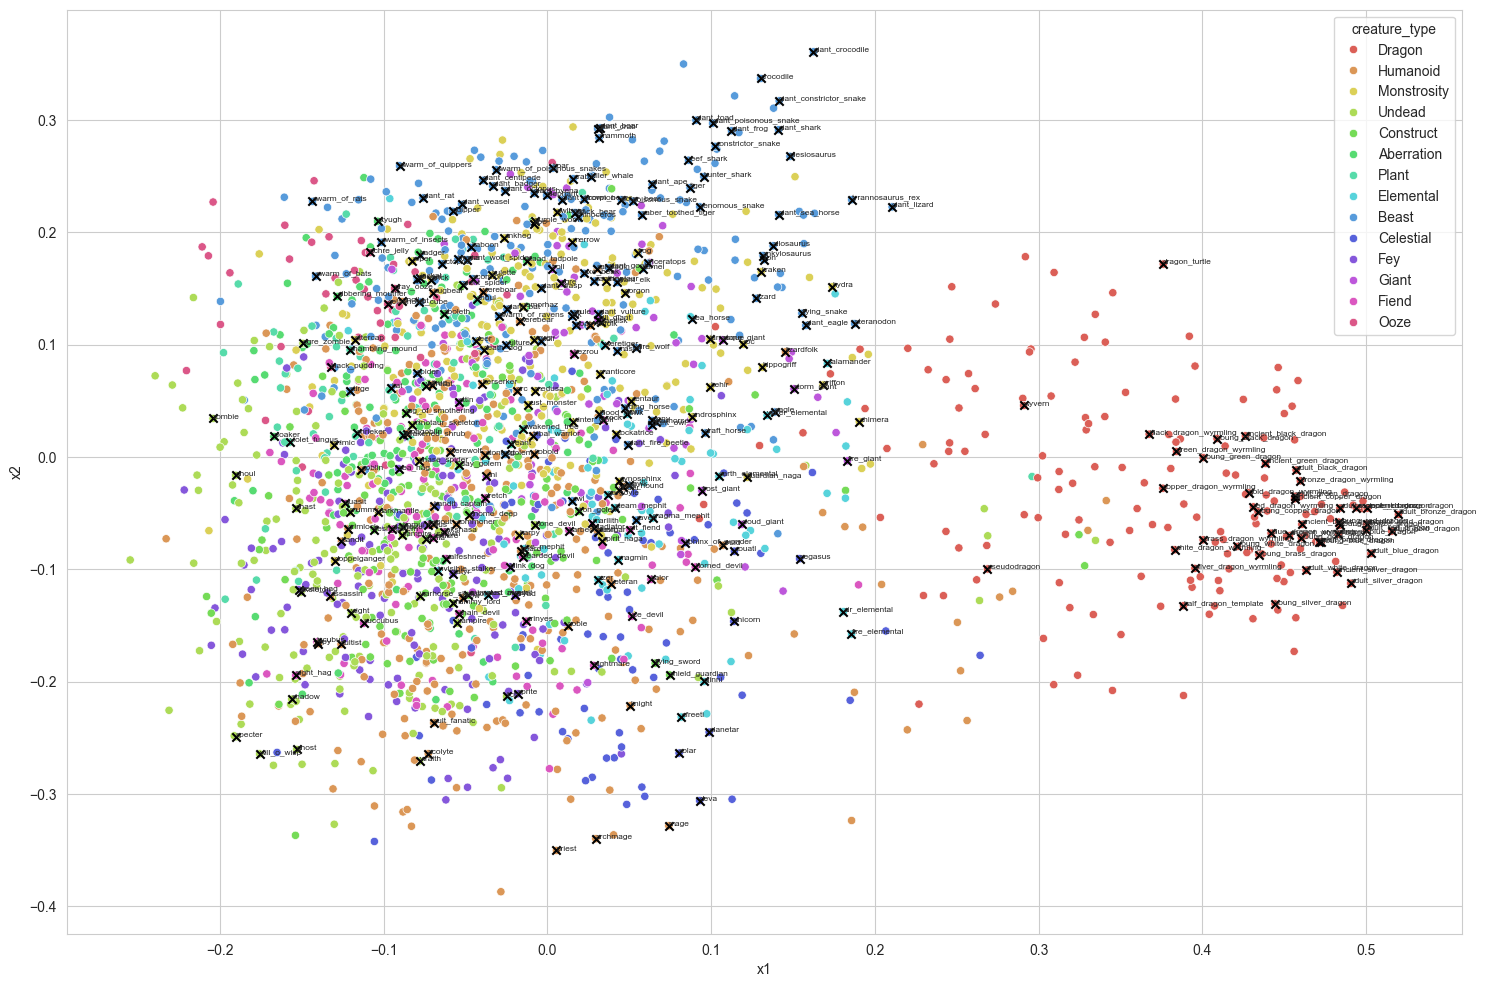

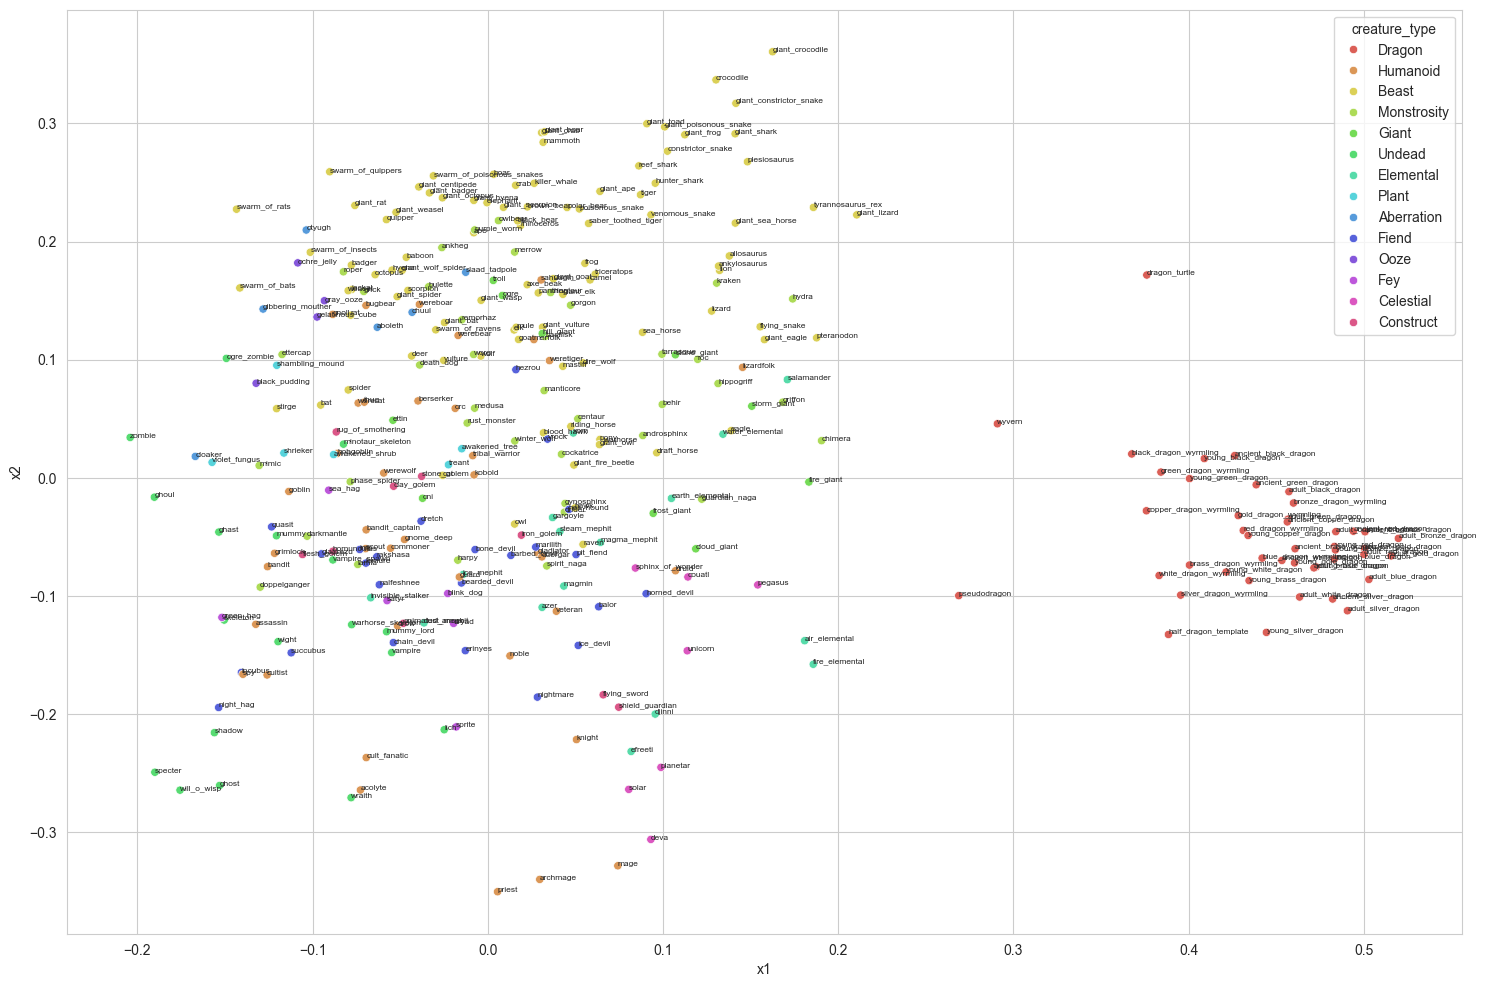

In [4]:
pca = PCA(n_components=2)
X = pca.fit_transform(embeddings.embeddings)
x1, x2 = X[:, 0], X[:, 1]

df = pd.DataFrame([
    pd.Series(x1, name='x1'),
    pd.Series(x2, name='x2'),
    pd.Series(ct, name='creature_type')
]).T

fig, ax = plt.subplots(1,1, figsize=(18,12))
sns.scatterplot(
    data=df,
    x = 'x1',
    y= 'x2',
    hue='creature_type'
)

iconic_srd_monsters = [m.key for _, m in monsters.items() if m.is_srd]

srd_xs, srd_ys, srd_cts = [], [], []
for key in iconic_srd_monsters:
    index = embeddings.key_index(key)
    embedding = embeddings[index]
    pca_x = pca.transform(embedding[np.newaxis, :])
    m_x, m_y = pca_x[0, 0], pca_x[0, 1]
    srd_xs.append(m_x)
    srd_ys.append(m_y)
    srd_cts.append(monsters[key].creature_type)

ax.scatter(
    x=srd_xs,
    y=srd_ys,
    color='k',
    marker='x'
)

for i, monster in enumerate(iconic_srd_monsters):
    ax.annotate(monster, (srd_xs[i], srd_ys[i]), size=6)


for srd_monster in iconic_srd_monsters:
    key = name_to_key(srd_monster)
    index = embeddings.key_index(key)
    embedding = embeddings[index]

    mask = np.ones(embeddings.n, dtype=np.bool)
    mask[index] = False
    others = embeddings.embeddings[mask,:]

    similarities = similarity(embedding[np.newaxis, :], others)
    similarities = similarities.flatten()

    distances = distance(embedding[np.newaxis, :], others)
    distances = distances.flatten()

    # indexes = np.argsort(similarities)
    # furthest = indexes[:3]
    # closest = indexes[-3:]
    # closest_keys = embeddings.keys[closest].tolist()
    # furthest_keys = embeddings.keys[furthest].tolist()
    # print(f"{key} is closest to {','.join(closest_keys)} and furthest from {','.join(furthest_keys)}")

    # indexes = np.argsort(distances)
    # furthest = indexes[-3:]
    # closest = indexes[:3]
    # closest_keys = embeddings.keys[closest].tolist()
    # furthest_keys = embeddings.keys[furthest].tolist()
    # print(f"{key} is closest to {','.join(closest_keys)} and furthest from {','.join(furthest_keys)}")


fig, ax = plt.subplots(1,1, figsize=(18,12))
df = pd.DataFrame([
    pd.Series(srd_xs, name='x1'),
    pd.Series(srd_ys, name='x2'),
    pd.Series(srd_cts, name='creature_type')
]).T

sns.scatterplot(
    data=df,
    x='x1',
    y='x2',
    hue='creature_type',
    ax=ax
)

for i, monster in enumerate(iconic_srd_monsters):
    ax.annotate(monster, (srd_xs[i], srd_ys[i]), size=6)




In [1]:
import numpy as np
from foe_foundry_nl.data.monsters import SrdMonsterSelector
rng = np.random.default_rng(20240711)
selector = SrdMonsterSelector(rng)


for _ in range(10):
    results = selector.random_positive_negative_triplet()
    for result in results:
        anchor, positive, negative, type = result
        print(f"{anchor=}, {positive=}, {negative=}, {type=}")



anchor='tiger', positive='lion', negative='rakshasa', type='creature_type'
anchor='tiger', positive='lamia', negative='efreeti', type='ac'
anchor='tiger', positive='azer', negative='behir', type='hp'
anchor='tiger', positive='swarm_of_quippers', negative='bulette', type='cr'
anchor='minotaur_skeleton', positive='flying_sword', negative='rhinoceros', type='creature_type'
anchor='minotaur_skeleton', positive='giant_goat', negative='silver_dragon_wyrmling', type='ac'
anchor='minotaur_skeleton', positive='gold_dragon_wyrmling', negative='ochre_jelly', type='hp'
anchor='minotaur_skeleton', positive='berserker', negative='camel', type='cr'
anchor='swarm_of_bats', positive='grick', negative='bronze_dragon_wyrmling', type='creature_type'
anchor='swarm_of_bats', positive='quipper', negative='pony', type='ac'
anchor='swarm_of_bats', positive='swarm_of_ravens', negative='hippogriff', type='hp'
anchor='swarm_of_bats', positive='harpy', negative='phase_spider', type='cr'
anchor='medusa', positive='

In [1]:
from foe_foundry_nl.data.monsters import get_canonical_monsters, save_monsters
save_monsters()
monsters = get_canonical_monsters()
subtypes = set()
for _, m in monsters.items():
    subtypes.update(m.creature_subtypes)
print(subtypes)


Loaded 2227 canonical monsters
{'titan', 'gnome', 'any race', 'goblinoid', 'sahuagin', 'elf', 'outsider', 'lycanthrope', 'gnoll', 'merfolk', 'devil', 'angel', 'dwarf', 'lizardfolk', 'any lineage', 'orc', 'shapechanger', 'demon', 'kobold', 'grimlock', 'animal', 'human'}
